<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Text_classification_transcript_md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


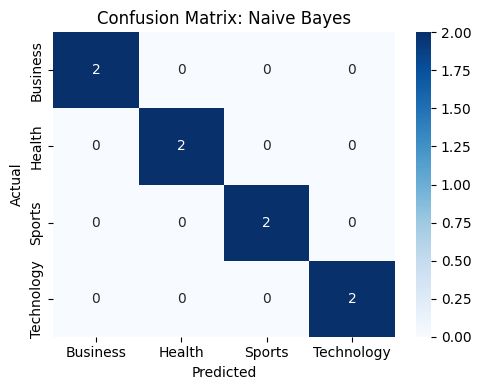

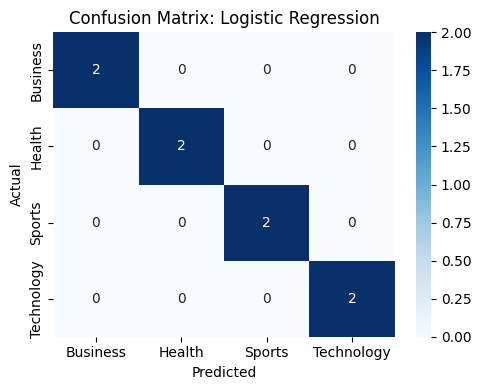

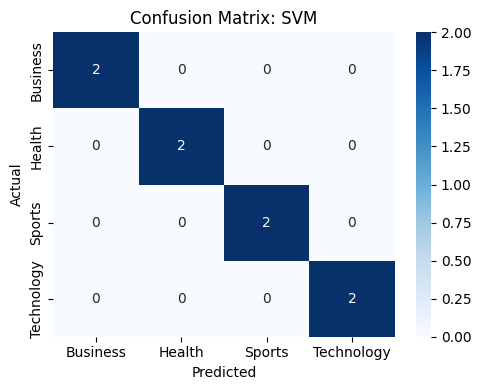

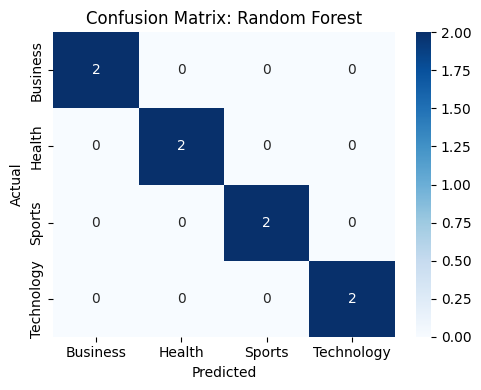

📊 Model Comparison Results:
                 Model  Accuracy  F1 Score  CrossVal Accuracy
0          Naive Bayes       1.0       1.0                1.0
1  Logistic Regression       1.0       1.0                1.0
2                  SVM       1.0       1.0                1.0
3        Random Forest       1.0       1.0                1.0


In [2]:
# --------------------------------------
# TEXT CLASSIFICATION FULL PIPELINE
# Covers: NB, SVM, LR, RF | TF-IDF & CountVec | CV | Multi-class
# --------------------------------------

import pandas as pd
import numpy as np
import re, string, nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# ----------------------
# Sample Dataset Creation
# ----------------------
def create_dataset():
    tech = ["AI breakthrough improves algorithms"] * 10
    sports = ["Team wins championship in overtime"] * 10
    business = ["Market hits record highs"] * 10
    health = ["New vaccine effective in trials"] * 10
    return pd.DataFrame({
        "text": tech + sports + business + health,
        "category": ["Technology"]*10 + ["Sports"]*10 + ["Business"]*10 + ["Health"]*10
    })

df = create_dataset()

# ----------------------
# Text Preprocessing
# ----------------------
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df["text_clean"] = df["text"].apply(preprocess)

# ----------------------
# Feature Extraction
# ----------------------
tfidf_vectorizer = TfidfVectorizer()
count_vectorizer = CountVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(df["text_clean"])
X_count = count_vectorizer.fit_transform(df["text_clean"])
y = df["category"]

# ----------------------
# Train/Test Split
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)

# ----------------------
# Model Definitions
# ----------------------
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# ----------------------
# Training, Evaluation & Cross-Validation
# ----------------------
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, output_dict=True)
    conf = confusion_matrix(y_test, y_pred)

    cv_score = cross_val_score(model, X_tfidf, y, cv=5, scoring='accuracy').mean()

    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "F1 Score": round(f1, 3),
        "CrossVal Accuracy": round(cv_score, 3)
    })

    # Visualize confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_ if hasattr(model, "classes_") else y.unique(),
                yticklabels=model.classes_ if hasattr(model, "classes_") else y.unique())
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# ----------------------
# Model Comparison
# ----------------------
results_df = pd.DataFrame(results)
print("📊 Model Comparison Results:")
print(results_df)
